Instructions:

1. Connect to Kaggle API in the following dataset.

https://www.kaggle.com/datasets/datasnaek/youtube-new?resource=download

2. Study the first 30 popular YouTube vidoes in Laos and Japan each (Total of 60 videos).
---



Goals:

1. What is the category that has the highest number of videos (the one that has been posted most frequent)?

2. What is the most popular category (the one that receives the highest number of likes)?

3. What is the channel that posted the most frequent?

4. Which channel has got the highest number of views?

5. Which channel has got the highest number of likes?

---



Steps:

0. Import libraries

1. Check dataset

2. Data cleaning

3. Analysis

4. Conclusion

---



# **0. Import libraries**

In [62]:
import pandas as pd
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/1. Data Science/1. Trending YouTube Video Statistics '
import pandas as pd
import json
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# **1. Check dataset**

In [2]:
# retrieve API of Trending YouTube Video Statistics data
!kaggle datasets download -d datasnaek/youtube-new

 95% 190M/201M [00:00<00:00, 202MB/s]
100% 201M/201M [00:01<00:00, 202MB/s]


In [3]:
# unzip the zip file and then remove the zip file
!unzip youtube-new.zip && rm youtube-new.zip

Archive:  youtube-new.zip
  inflating: CA_category_id.json     
  inflating: CAvideos.csv            
  inflating: DE_category_id.json     
  inflating: DEvideos.csv            
  inflating: FR_category_id.json     
  inflating: FRvideos.csv            
  inflating: GB_category_id.json     
  inflating: GBvideos.csv            
  inflating: IN_category_id.json     
  inflating: INvideos.csv            
  inflating: JP_category_id.json     
  inflating: JPvideos.csv            
  inflating: KR_category_id.json     
  inflating: KRvideos.csv            
  inflating: MX_category_id.json     
  inflating: MXvideos.csv            
  inflating: RU_category_id.json     
  inflating: RUvideos.csv            
  inflating: US_category_id.json     
  inflating: USvideos.csv            


In [4]:
# create and show the dataframe
df = pd.read_csv('/content/CAvideos.csv')
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [5]:
# show the last 5 rows of the dataframe
df.tail(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
40876,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13T18:00:07.000Z,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,False,False,False,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...
40877,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13T19:01:18.000Z,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,False,False,False,► Retrouvez vos programmes préférés : https://...
40878,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,2018-06-11T17:30:53.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,https://i.ytimg.com/vi/GWlKEM3m2EE/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...
40879,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13T04:00:05.000Z,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,https://i.ytimg.com/vi/lbMKLzQ4cNQ/default.jpg,False,False,False,Peter Navarro isn’t talking so tough now. Ana ...
40880,POTgw38-m58,18.14.06,【完整版】遇到恐怖情人該怎麼辦？2018.06.13小明星大跟班,我愛小明星大跟班,24,2018-06-13T16:00:03.000Z,"吳宗憲|""吳姍儒""|""小明星大跟班""|""Sandy""|""Jacky wu""|""憲哥""|""中天...",107392,300,62,251,https://i.ytimg.com/vi/POTgw38-m58/default.jpg,False,False,False,藝人：李妍瑾、玉兔、班傑、LaLa、小優、少少專家：陳筱屏(律師)、Wendy(心理師)、羅...


In [6]:
# show the dimension of the dataframe
df.shape

(40881, 16)

*There are 40,881 rows and 16 columns in the dataframe.*

---



In [7]:
# show the non-null count and datatype of each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40881 non-null  object
 1   trending_date           40881 non-null  object
 2   title                   40881 non-null  object
 3   channel_title           40881 non-null  object
 4   category_id             40881 non-null  int64 
 5   publish_time            40881 non-null  object
 6   tags                    40881 non-null  object
 7   views                   40881 non-null  int64 
 8   likes                   40881 non-null  int64 
 9   dislikes                40881 non-null  int64 
 10  comment_count           40881 non-null  int64 
 11  thumbnail_link          40881 non-null  object
 12  comments_disabled       40881 non-null  bool  
 13  ratings_disabled        40881 non-null  bool  
 14  video_error_or_removed  40881 non-null  bool  
 15  de

*Only description variable (column 15) has null values.*

---



# **2. Data cleaning**

In [8]:
# check the null values again
df.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1296
dtype: int64

*Description variable has 1,296 null values. So we will remove rows that have null values later. But first we will remove variables we think we will not use at this time which are video_id, thumbnail_link and description.*

---



In [9]:
# remove video_id variable
df.drop(df.columns[df.columns.str.contains('video_id', case=False)], axis=1, inplace=True)

In [10]:
# remove thumbnail_link variable
df.drop(df.columns[df.columns.str.contains('thumbnail_link')], axis=1, inplace=True)

In [11]:
# remove description variable
df.drop(df.columns[df.columns.str.contains('description')], axis=1, inplace=True)

In [12]:
# check the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   trending_date           40881 non-null  object
 1   title                   40881 non-null  object
 2   channel_title           40881 non-null  object
 3   category_id             40881 non-null  int64 
 4   publish_time            40881 non-null  object
 5   tags                    40881 non-null  object
 6   views                   40881 non-null  int64 
 7   likes                   40881 non-null  int64 
 8   dislikes                40881 non-null  int64 
 9   comment_count           40881 non-null  int64 
 10  comments_disabled       40881 non-null  bool  
 11  ratings_disabled        40881 non-null  bool  
 12  video_error_or_removed  40881 non-null  bool  
dtypes: bool(3), int64(5), object(5)
memory usage: 3.2+ MB


*We now have 12 variables left.*

---



In [13]:
# check if there duplicate rows or note
df[df.duplicated()].shape

(0, 13)

*There is no duplicate row becasue the row index shows 0.*

---



In [14]:
# check the null values again in the descending order
df.isnull().sum().sort_values(ascending=False)

trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
dtype: int64

*There is no variable that has null values.*

---



In [15]:
# check the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   trending_date           40881 non-null  object
 1   title                   40881 non-null  object
 2   channel_title           40881 non-null  object
 3   category_id             40881 non-null  int64 
 4   publish_time            40881 non-null  object
 5   tags                    40881 non-null  object
 6   views                   40881 non-null  int64 
 7   likes                   40881 non-null  int64 
 8   dislikes                40881 non-null  int64 
 9   comment_count           40881 non-null  int64 
 10  comments_disabled       40881 non-null  bool  
 11  ratings_disabled        40881 non-null  bool  
 12  video_error_or_removed  40881 non-null  bool  
dtypes: bool(3), int64(5), object(5)
memory usage: 3.2+ MB


*trending_date and publish_time variables are in object type. So let's set them to date format instead.*

---



In [16]:
# set datetime format for publish_time variable
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [17]:
# check the publish_time variable
df['publish_time']

0       2017-11-10 17:00:03
1       2017-11-13 17:00:00
2       2017-11-12 19:05:24
3       2017-11-12 18:01:41
4       2017-11-09 11:04:14
                ...        
40876   2018-06-13 18:00:07
40877   2018-06-13 19:01:18
40878   2018-06-11 17:30:53
40879   2018-06-13 04:00:05
40880   2018-06-13 16:00:03
Name: publish_time, Length: 40881, dtype: datetime64[ns]

*The date format has been changed to our favor. But there might be some rows that do not follow the specific type of date. Let's set set the non-matching values to NaN.*

---



In [18]:
# set non-matching values to NaN
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ', errors='coerce')

In [19]:
# let's check if publish_time variable has any NaN
df['publish_time'].isnull().sum()

0

*Number 0 means that there is no row that is NaN.*

---



In [20]:
# set time format for trending_date variable and set the non-matching values to NaN
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m', errors='coerce')

In [21]:
# check trending_date variable
df['trending_date']

0       2017-11-14
1       2017-11-14
2       2017-11-14
3       2017-11-14
4       2017-11-14
           ...    
40876   2018-06-14
40877   2018-06-14
40878   2018-06-14
40879   2018-06-14
40880   2018-06-14
Name: trending_date, Length: 40881, dtype: datetime64[ns]

In [22]:
# check if trending_date variable has any NaN values
df['trending_date'].isnull().sum()

0

*Number 0 means that there is no row that is NaN.*


---



In [23]:
# check the dataframe again
df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,False,False,False
1,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,False,False,False
2,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,False,False,False
3,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,False,False,False
4,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,False,False,False


In [24]:
# check datatype of each variable
df.dtypes

trending_date             datetime64[ns]
title                             object
channel_title                     object
category_id                        int64
publish_time              datetime64[ns]
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
dtype: object

*We see that views, likes, dislikes and comment_count variables are in integer type. So let's change them to float instead.*


---



In [25]:
# change data type of views, likes, dislikes and comment_count variables to float
type_float_list = ['views', 'likes', 'dislikes', 'comment_count']

for i in type_float_list:
    df[i] = df[i].astype(float)

In [26]:
# check the data type again
df.dtypes

trending_date             datetime64[ns]
title                             object
channel_title                     object
category_id                        int64
publish_time              datetime64[ns]
tags                              object
views                            float64
likes                            float64
dislikes                         float64
comment_count                    float64
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
dtype: object

*Since we will match the category_id variable to its category (new) variable later, we will change category_id data type to object instead of int64.*

---



In [27]:
# change category_id data type to string
df['category_id'] = df['category_id'].astype(str)

In [28]:
# check the data type again
df.dtypes

trending_date             datetime64[ns]
title                             object
channel_title                     object
category_id                       object
publish_time              datetime64[ns]
tags                              object
views                            float64
likes                            float64
dislikes                         float64
comment_count                    float64
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
dtype: object

In [29]:
# match category_id to its category item
id_to_category = {}

with open('/content/CA_category_id.json', 'r') as f:
    data = json.load(f)

    for i in data['items']:
        id_to_category[i['id']] = i['snippet']['title']

In [30]:
# show this new dictionary of id and category
id_to_category

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [31]:
# add a new column called category and map it next to the category_id column
df.insert(4, 'category', df['category_id'].map(id_to_category))

In [32]:
# check the dataframe again of those two columns
df[['category_id', 'category']].head()

,category_id,category
0,10,Music
1,23,Comedy
2,23,Comedy
3,24,Entertainment
4,10,Music


In [33]:
# check the dateframe
df.head()

,trending_date,title,channel_title,category_id,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,Music,2017-11-10 17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579.0,787425.0,43420.0,125882.0,False,False,False
1,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,Comedy,2017-11-13 17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651.0,127794.0,1688.0,13030.0,False,False,False
2,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,Comedy,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434.0,146035.0,5339.0,8181.0,False,False,False
3,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,Entertainment,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828.0,132239.0,1989.0,17518.0,False,False,False
4,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,Music,2017-11-09 11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622.0,1634130.0,21082.0,85067.0,False,False,False


In [34]:
# remove tag variable
df = df.drop('tags', axis=1)

In [35]:
# check the dataframe again
df.tail()

,trending_date,title,channel_title,category_id,category,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
40876,2018-06-14,HOW2: How to Solve a Mystery,Annoying Orange,24,Entertainment,2018-06-13 18:00:07,80685.0,1701.0,99.0,1312.0,False,False,False
40877,2018-06-14,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,Entertainment,2018-06-13 19:01:18,103339.0,460.0,66.0,51.0,False,False,False
40878,2018-06-14,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,Gaming,2018-06-11 17:30:53,773347.0,25900.0,224.0,3881.0,False,False,False
40879,2018-06-14,Trump Advisor Grovels To Trudeau,The Young Turks,25,News & Politics,2018-06-13 04:00:05,115225.0,2115.0,182.0,1672.0,False,False,False
40880,2018-06-14,【完整版】遇到恐怖情人該怎麼辦？2018.06.13小明星大跟班,我愛小明星大跟班,24,Entertainment,2018-06-13 16:00:03,107392.0,300.0,62.0,251.0,False,False,False


# **3. Analysis**

Questions:

1. What is the category that has the highest number of videos (the one that has been posted most frequent)?

2. What is the most popular category (the one that receives the highest number of likes)?

3. What is the channel that posted the most frequent?

4. Which channel has got the highest number of views?

5. Which channel has got the highest number of likes?

---



**Q1. What is the category that has the highest number of videos (the one that has been posted most frequent)?**

---




*So we have to find the total number of videos appeared in each category.*

---



In [36]:
# count the number of rows in each category
categories = df['category'].value_counts()
categories

Entertainment           13451
News & Politics          4159
People & Blogs           4105
Comedy                   3773
Music                    3731
Sports                   2787
Film & Animation         2060
Howto & Style            2007
Gaming                   1344
Science & Technology     1155
Education                 991
Travel & Events           392
Pets & Animals            369
Autos & Vehicles          353
Shows                     124
Movies                      6
Name: category, dtype: int64

***A1. Entertainment category has the higest number of videos. It covers 33% of the total.***

In [47]:
# show its pie chart
fig = px.pie(
    values=categories.values,
    names=categories.index,
    title='YouTube Categories',
    template='presentation'
)

fig.update_traces(
    textposition='inside',
    textfont_size=12,
    textinfo='percent+label'
)

fig.show()

**Q2. What is the most popular category (the one that receives the highest number of likes)?**

---



In [59]:
# group the category and show its total likes in descending order
df.groupby('category')['likes'].sum().sort_values(ascending=False)

category
Music                   564447530.0
Entertainment           387245433.0
Comedy                  196046674.0
People & Blogs          105388564.0
Film & Animation         77802003.0
Sports                   59449419.0
Gaming                   51726552.0
Howto & Style            51183104.0
Science & Technology     42814598.0
News & Politics          32705054.0
Education                20972402.0
Pets & Animals            8830736.0
Autos & Vehicles          4732114.0
Travel & Events           3750914.0
Shows                      589263.0
Movies                     252905.0
Name: likes, dtype: float64

***A2. Music category has the highest number of likes with 564,447,530 likes.***

---



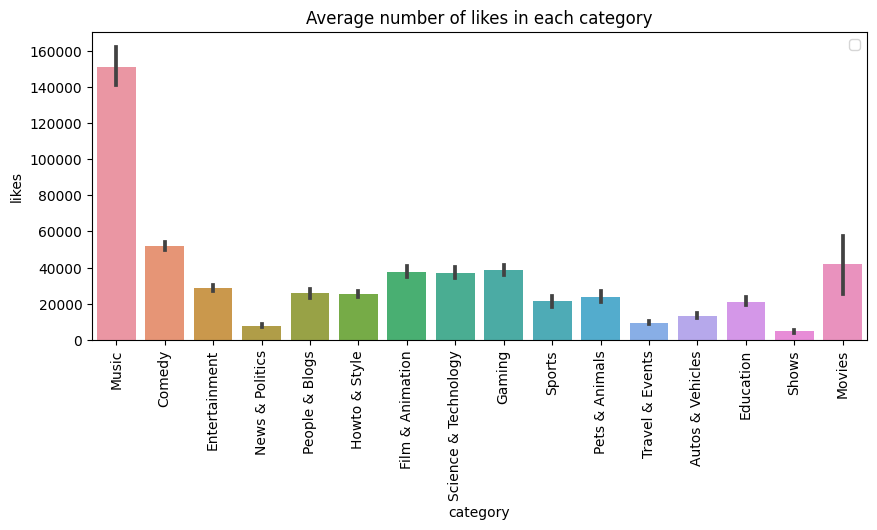

In [67]:
# extra: show the average number of likes in each category through bar chart (average = number of likes/number of video posted)
plt.figure(figsize=(10, 4))
sns.barplot(x='category', y='likes', data=df)
plt.title('Average number of likes in each category')
plt.xticks(rotation='vertical')
plt.ticklabel_format(axis='y', style='plain')
plt.legend()

*We found that music category has the highest number of average likes. Meaning that videos ralated to music was posted 3,731 times and has received 564,447,530 likes. So on average, one post of music video will receive 151,285 likes.*

**3. What is the channel that posted the most frequent?**

---



In [92]:
# count the number of videos in each channel
df1 = df.groupby('channel_title').count().sort_values(by='likes', ascending=False)['category'].head(10)
df1

channel_title
SET India                             192
MSNBC                                 189
FBE                                   188
The Young Turks                       186
REACT                                 183
VikatanTV                             182
CNN                                   180
The Late Show with Stephen Colbert    172
RadaanMedia                           168
ARY Digital                           168
Name: category, dtype: int64

***A3. SET India channel has posted most frequent which is 192 times.***

---



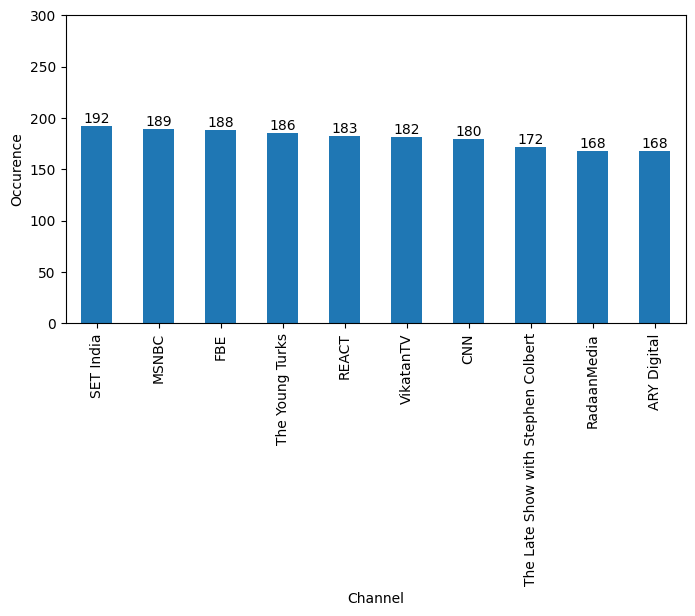

In [93]:
# show its bar graph
plt.figure(figsize=(8, 4))
df1.plot.bar().bar_label(df1.plot.bar().containers[0])
plt.ylim(0, 300)
plt.xlabel('Channel')
plt.ylabel('Occurence')
plt.show()

In [98]:
# extra: count the number of unqiue channels
df['channel_title'].nunique( )

5076

**Q4. Which channel has got the highest number of views?**

---



In [118]:
# find the channel which has the highest number of views
df2 = df.groupby('channel_title').sum().sort_values('views', ascending=False)['views'].head()
#df2 = df2.apply(lambda x: format(x, '0f'))
df2

<ipython-input-118-1a1cbf88fc4e>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



channel_title
Marvel Entertainment    1.011420e+09
T-Series                7.991140e+08
Dude Perfect            7.299163e+08
YouTube Spotlight       6.359768e+08
ibighit                 5.115679e+08
Name: views, dtype: float64

***A4. The channel that has got the highest number of views is Marvel Entertainment with 1,011,420,205 views.***

---



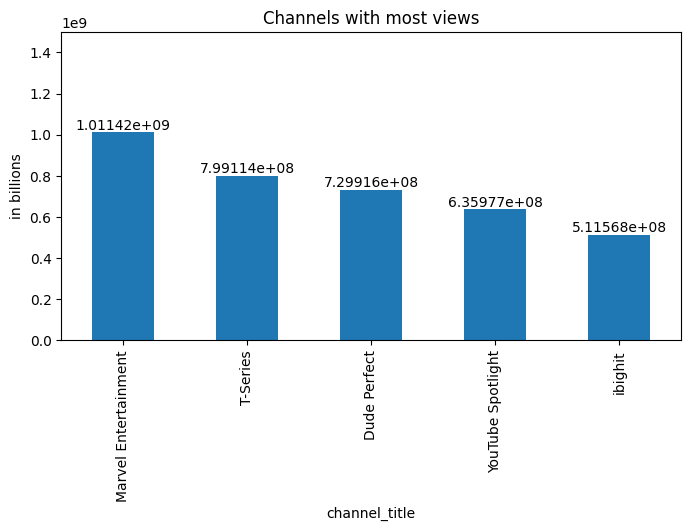

In [137]:
# show its bar chart
plt.figure(figsize=(8, 4))
df2.plot.bar().bar_label(df2.plot.bar().containers[0])
plt.ylabel('in billions')
plt.ylim(0, 1500000000)
plt.title('Channels with most views')
#plt.ticklabel_format(axis='y', style='plain')
plt.show()

**Q5. Which channel has got the highest number of likes?**

---



In [129]:
# find the channel with highest number of likes
df3 = df.groupby('channel_title').sum().sort_values('likes', ascending=False)['likes'].head()
df3

<ipython-input-129-ff23ce0b7a13>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



channel_title
ibighit                 50259874.0
PewDiePie               33596931.0
Marvel Entertainment    32892782.0
Dude Perfect            28298398.0
Logan Paul Vlogs        19592343.0
Name: likes, dtype: float64

***A5. ibighit has the highest number of likes which is 50,259,874 likes.***

---



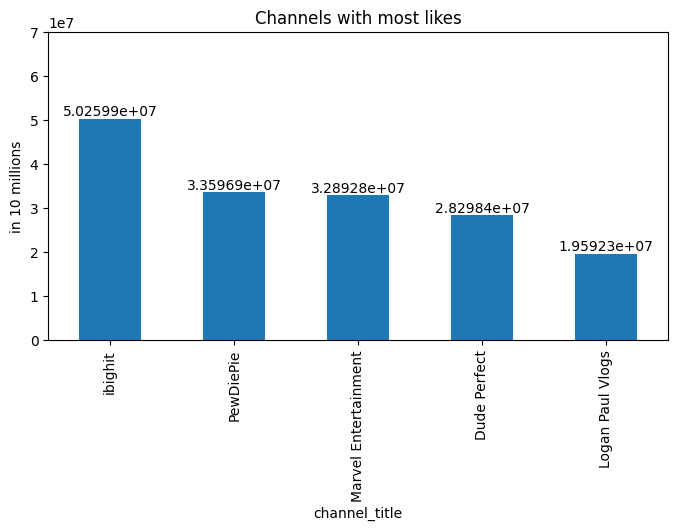

In [136]:
# show its bar graph
plt.figure(figsize=(8, 4))
df3.plot.bar().bar_label(df3.plot.bar().containers[0])
plt.ylim(0, 70000000)
plt.ylabel('in 10 millions')
plt.title('Channels with most likes')
plt.show()

# **4. Conclusion**

*A1. Entertainment category has the higest number of videos. It covers 33% of the total.*

*A2. Music category has the highest number of likes with 564,447,530 likes.*

*A3. SET India channel has posted most frequent which is 192 times.*

*A4. The channel that has got the highest number of views is Marvel Entertainment with 1,011,420,205 views.*

*A5. ibighit has the highest number of likes which is 50,259,874 likes.*

---

